Example of the use of the function that allows the training on a dataset of blurred images generated via convolution with a kernel which is the same for each image. As an example, I used a disk kernel to generate a simulated out-of-focus effect, but camera shake blur kernel generated with the MotionPSF object can be used.

In [1]:
import os
os.chdir(os.path.expanduser(r'C:\Users\innoc\PycharmProjects\csb-dataset-generator'))

In [2]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays

from package.torch_dataset_loaders.constant_kernel_dataset import ConstantKernelDataset
from package.psf_generation.disk_psf import disk_psf_generation

In [3]:
image_size = 256
psf_size = 32
disk_size = 6  # max radius in pixel
batch_size = 8
imagenet_train_path = r'C:\Users\innoc\PycharmProjects\PyConvBlur\datasets\imagenet\ILSVRC\Data\CLS-LOC\val'
kernel = disk_psf_generation(psf_size, disk_size)
train_dataset = ConstantKernelDataset(imagenet_train_path, kernel, image_size=image_size, crop='random')
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False,)

Plotting the out-of-focus kernel

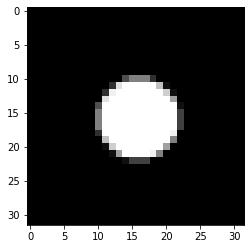

In [4]:
plt.imshow(kernel, cmap="gray")
plt.show()

Plotting a batch, to show the processed images

image 0 blurred:


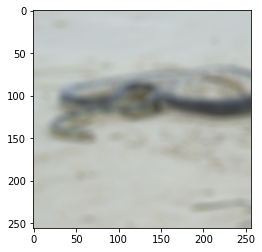

image 0 ground truth:


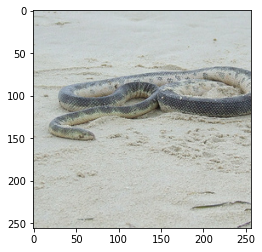

image 1 blurred:


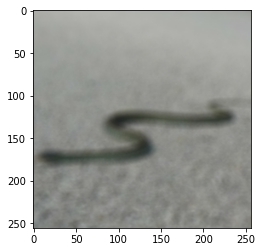

image 1 ground truth:


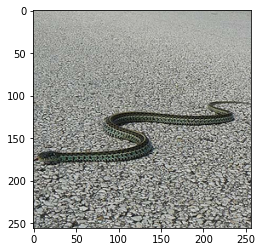

image 2 blurred:


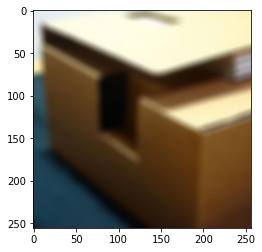

image 2 ground truth:


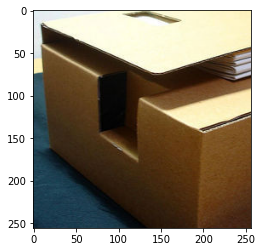

image 3 blurred:


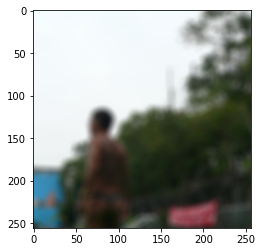

image 3 ground truth:


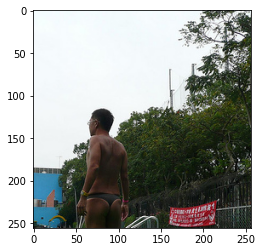

image 4 blurred:


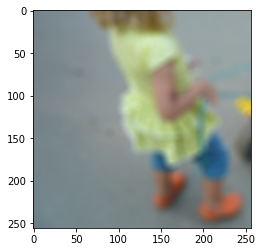

image 4 ground truth:


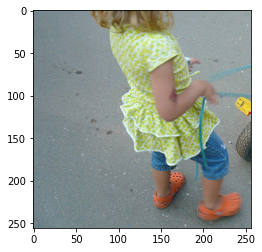

image 5 blurred:


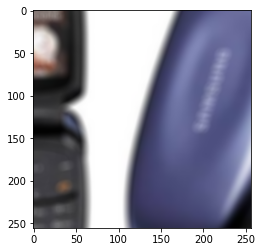

image 5 ground truth:


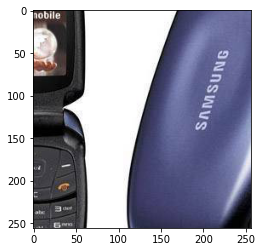

image 6 blurred:


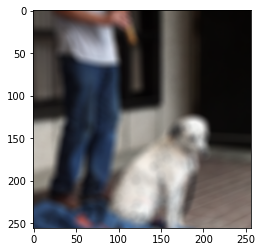

image 6 ground truth:


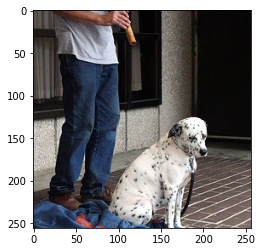

image 7 blurred:


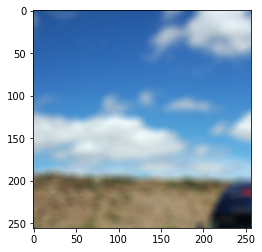

image 7 ground truth:


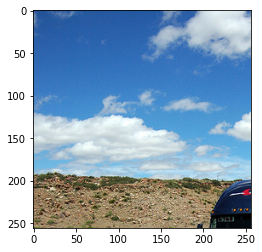

In [7]:
train_batch, label_batch = next(iter(train_dataloader))
train_batch = np.moveaxis(train_batch.numpy(), 1, -1)
label_batch = np.moveaxis(label_batch.numpy(), 1, -1)
for i, _ in enumerate(train_batch):
    print('image '+str(i)+' blurred:')
    plt.imshow(train_batch[i])
    plt.show()
    print('image '+str(i)+' ground truth:')
    plt.imshow(label_batch[i])
    plt.show()

The train and test dataloaders can then be used to train neural networks in PyTorch